<a href="https://colab.research.google.com/github/Krzesimir13/DataQuest/blob/main/time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


#Part 1

In [ ]:
# @title
parent = Path('/content/drive/MyDrive/Colab Notebooks')
file = parent / 'WHO_time_series.csv'
who_time_series = pd.read_csv(file)
who_time_series.head()

In [20]:
# @title
who_time_series['Date_reported'] = pd.to_datetime(who_time_series['Date_reported'])

In [22]:
# @title
who_time_series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31876 entries, 0 to 31875
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date_reported      31876 non-null  datetime64[ns]
 1   Country            31876 non-null  object        
 2   New_cases          31876 non-null  int64         
 3   Cumulative_cases   31876 non-null  int64         
 4   New_deaths         31876 non-null  int64         
 5   Cumulative_deaths  31876 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 1.5+ MB


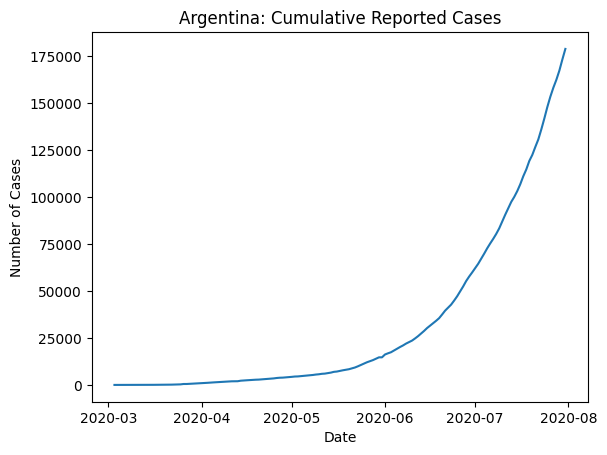

In [26]:
# @title
argentina = who_time_series[who_time_series['Country'] == 'Argentina']

plt.plot(argentina['Date_reported'], argentina['Cumulative_cases'])
plt.title("Argentina: Cumulative Reported Cases")
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.show()

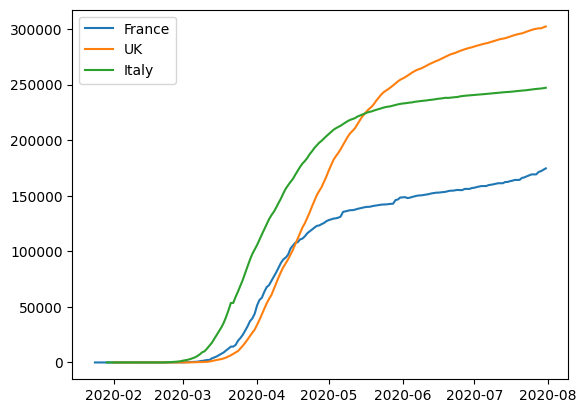

In [27]:
# @title
france = who_time_series[who_time_series['Country'] == 'France']
uk = who_time_series[who_time_series['Country'] == 'The United Kingdom']
italy = who_time_series[who_time_series['Country'] == 'Italy']

plt.plot(france['Date_reported'], france['Cumulative_cases'], label='France')
plt.plot(uk['Date_reported'], uk['Cumulative_cases'], label='UK')
plt.plot(italy['Date_reported'], italy['Cumulative_cases'], label='Italy')
plt.legend()
plt.show()

#Part 2

In [3]:
# @title
import zipfile


parent = Path('/content/drive/MyDrive/Colab Notebooks')
zip_path = parent / 'bike+sharing+dataset.zip'

with zipfile.ZipFile(zip_path, 'r') as archive:
    with archive.open('day.csv') as file:
        bike_sharing = pd.read_csv(file)

print(bike_sharing.head())
print(bike_sharing.tail())
print(bike_sharing.info())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
     instant      dteday  

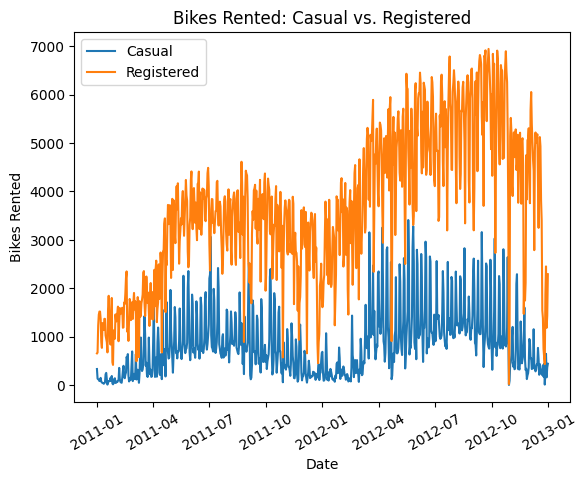

In [10]:
# @title
bike_sharing['dteday'] = pd.to_datetime(bike_sharing['dteday'])
plt.plot(bike_sharing['dteday'], bike_sharing['casual'], label='Casual')
plt.plot(bike_sharing['dteday'], bike_sharing['registered'], label='Registered')
plt.xlabel('Date')
plt.ylabel('Bikes Rented')
plt.title('Bikes Rented: Casual vs. Registered')
plt.xticks(rotation=30)
plt.legend()
plt.show()

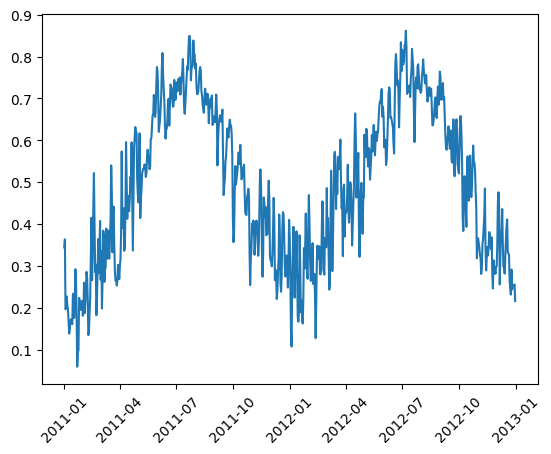

In [11]:
plt.plot(bike_sharing['dteday'], bike_sharing['temp'])
plt.xticks(rotation=45)
plt.show()

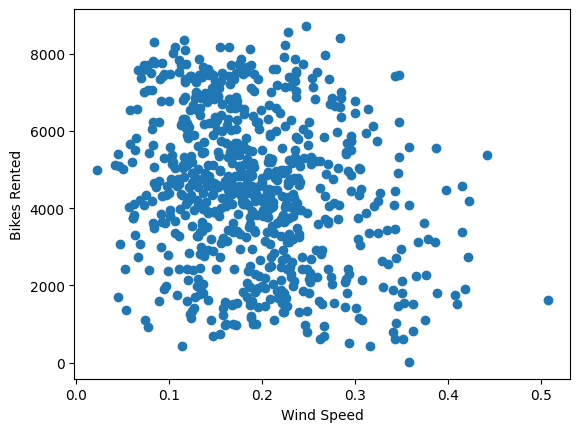

In [11]:
plt.scatter(bike_sharing['windspeed'], bike_sharing['cnt'])
plt.xlabel('Wind Speed')
plt.ylabel('Bikes Rented')
plt.show()

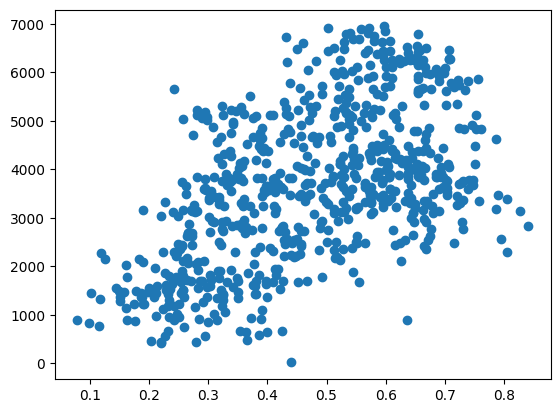

In [12]:
plt.scatter(bike_sharing['atemp'], bike_sharing['registered'])
#plt.xlabel('Wind Speed')
#plt.ylabel('Bikes Rented')
plt.show()

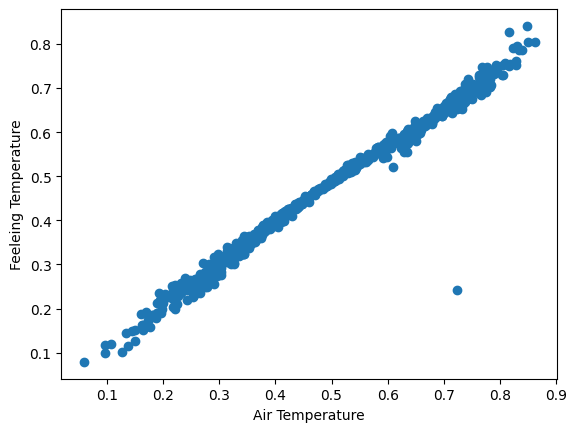

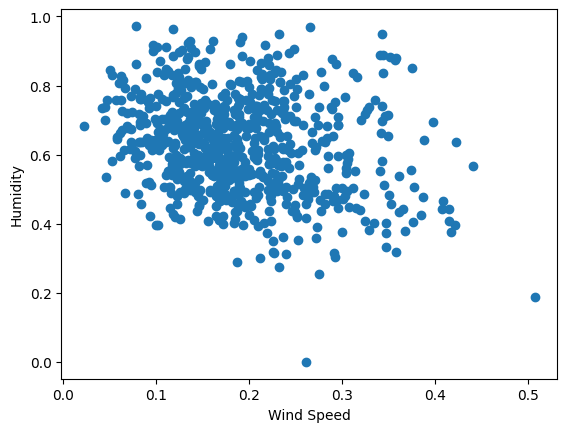

In [15]:
temp_atemp_corr = bike_sharing['temp'].corr(bike_sharing['atemp'])
wind_hum_corr = bike_sharing['windspeed'].corr(bike_sharing['hum'])
plt.scatter(bike_sharing['temp'], bike_sharing['atemp'])
plt.xlabel('Air Temperature')
plt.ylabel('Feeleing Temperature')
plt.show()
plt.scatter(bike_sharing['windspeed'], bike_sharing['hum'])
plt.xlabel('Wind Speed')
plt.ylabel('Humidity')
plt.show()

#Part 3

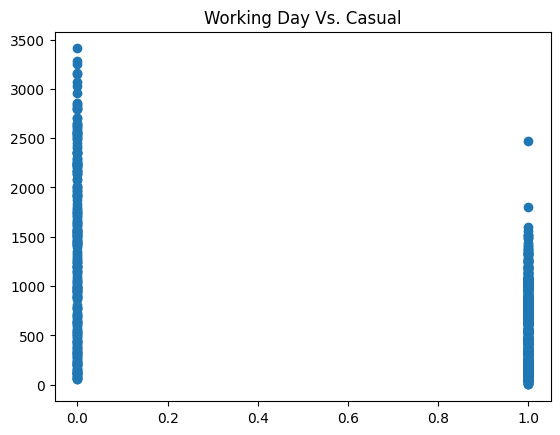

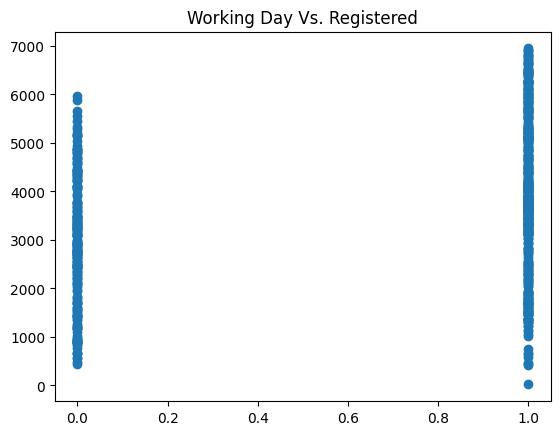

In [16]:
plt.scatter(bike_sharing['workingday'], bike_sharing['casual'])
plt.title('Working Day Vs. Casual')
plt.show()
plt.scatter(bike_sharing['workingday'], bike_sharing['registered'])
plt.title('Working Day Vs. Registered')
plt.show()

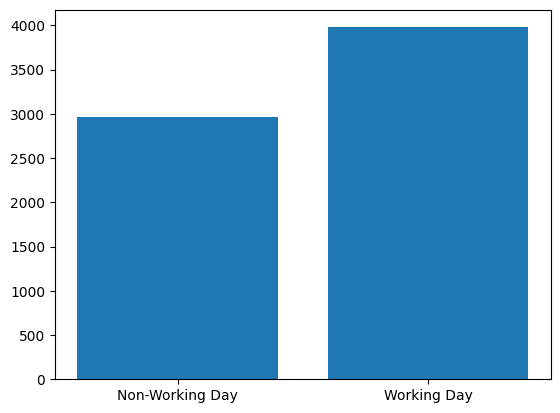

In [5]:
working_days = ['Non-Working Day', 'Working Day']
registered_avg = [2959, 3978]

plt.bar(working_days, registered_avg)
plt.show()

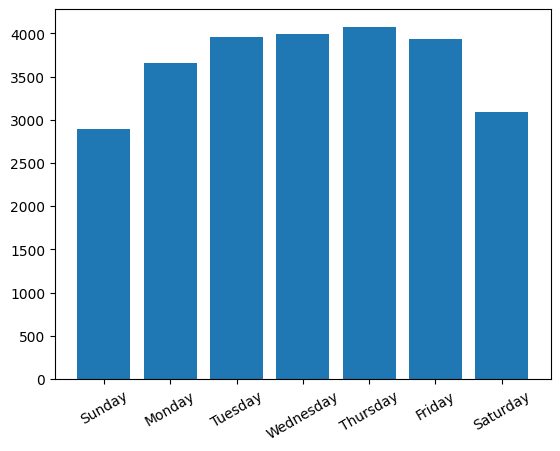

In [22]:
weekday_averages = bike_sharing.groupby('weekday')\
.mean()[['casual', 'registered']].reset_index()
weekday_averages.weekday = ['Sunday', 'Monday', 'Tuesday', 'Wednesday',
           'Thursday', 'Friday', 'Saturday']
plt.bar(weekday_averages['weekday'], weekday_averages['registered'])
plt.xticks(rotation=30)
plt.show()

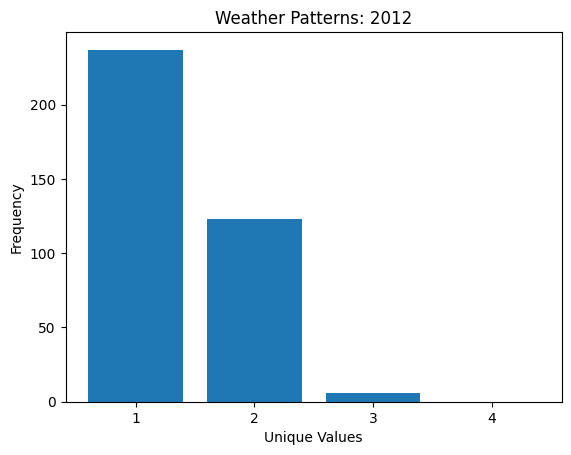

In [26]:
unique_values = [1, 2, 3, 4]
weather_2011 = [226, 124, 15, 0]
weather_2012 = [237, 123, 6, 0]

plt.bar(unique_values, weather_2012)
plt.xticks(ticks=[1, 2, 3, 4])
plt.title('Weather Patterns: 2012')
plt.xlabel('Unique Values')
plt.ylabel('Frequency')
plt.show()

In [28]:
registered_freq = bike_sharing['registered'].value_counts(bins=10).sort_index()
casual_freq = bike_sharing['casual'].value_counts(bins=10, ).sort_index()

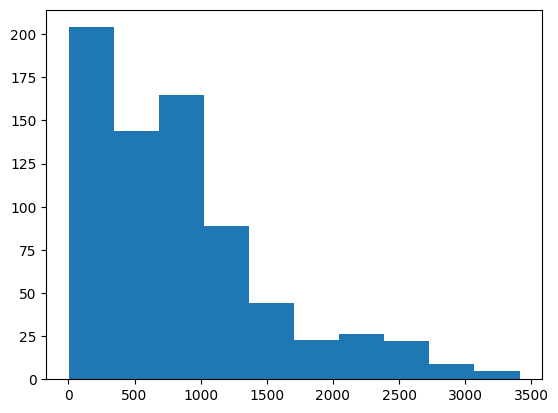

In [30]:
plt.hist(bike_sharing['casual'])
plt.show()